1. tsv파일 로드
2. order_id 컬럼은 숫자의 의미를 가지지 않기 때문에 문자형 데이터를 변환
3. 가장 많이 주문한 item_name과 그 수량을 출력
4. item당 주문 총량 구하고 바형 그래프로 출력
5. item_price 컬럼은 $금액 -> 금액 변경을 하면서 float의 형태로 변환
6. 주문당 평균 계산 금액 출력
7. 각 아이템의 가격을 출력한 후, 가격 분포 그래프 / 가격 히스토그램 출력
8. 'Chicken bowl'을 2개 이상 주문한 고객들의 'Chicken Bowl' 메뉴의 총 주문 수량 출력

In [1]:
import pandas as pd

In [5]:
# tsv 파일 로드
chipotle= pd.read_csv('../csv/num_1/chipotle.tsv', sep='\t')
chipotle.head(1)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39


In [6]:
chipotle_copy=chipotle

In [8]:
# order_id 컬럼은 숫자의 의미가 없기 때문에 문자열로 데이터형 변환
# astype() 함수를 이용하여 데이터의 형태를 변환

chipotle_copy['order_id']=chipotle_copy['order_id'].astype(str)

In [13]:
# 가장 많이 주문한 item_name과 그 수량을 출력
# 그룹화 -> sum() -> quantity -> sort_values 내림차순 정렬
# top10을 출력하려면?
chipotle_copy.groupby('item_name').sum()['quantity'].sort_values(ascending=False).head(10)

C:\Users\ssjjk\AppData\Local\Temp\ipykernel_64732\4092041511.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chipotle_copy.groupby('item_name').sum()['quantity'].sort_values(ascending=False).head(10)


item_name
Chicken Bowl                    761
Chicken Burrito                 591
Chips and Guacamole             506
Steak Burrito                   386
Canned Soft Drink               351
Chips                           230
Steak Bowl                      221
Bottled Water                   211
Chips and Fresh Tomato Salsa    130
Canned Soda                     126
Name: quantity, dtype: int64

In [17]:
# 주문횟수가 가장 많은 메뉴는?

chipotle_copy['item_name'].value_counts().head(10)


Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [21]:
chipotle_copy.groupby('item_name').count().sort_values('order_id')

,order_id,quantity,choice_description,item_price
item_name,,,,
Carnitas Salad,1,1,1,1
Veggie Crispy Tacos,1,1,1,1
Chips and Mild Fresh Tomato Salsa,1,1,0,1
Crispy Tacos,2,2,2,2
Bowl,2,2,2,2
Salad,2,2,2,2
Steak Salad,4,4,4,4
Veggie Salad,6,6,6,6
Carnitas Salad Bowl,6,6,6,6


In [22]:
# 주문 총량 시각화

import matplotlib.pyplot as plt

C:\Users\ssjjk\AppData\Local\Temp\ipykernel_64732\682391250.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_data = chipotle_copy.groupby('item_name').sum()['quantity'].sort_values(ascending=False)


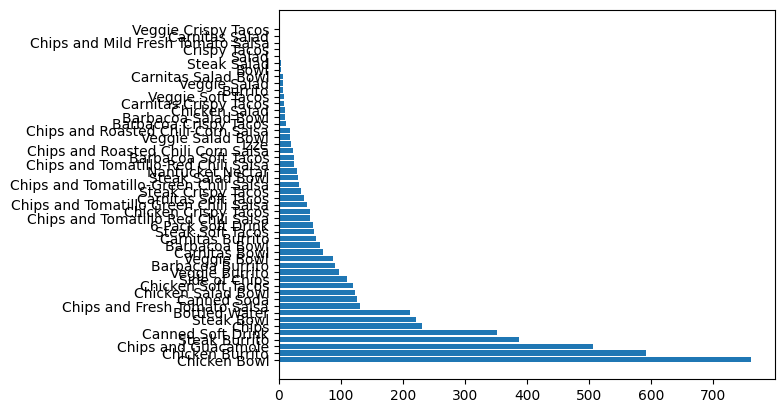

In [31]:
# 주문총량 바형 그래프로 출력
group_data = chipotle_copy.groupby('item_name').sum()['quantity'].sort_values(ascending=False)

# x축과 y축의 값을 어떠한 값을 넣어야 할지 지정
x=group_data.index
y=group_data.values

# 바형 그래프 출력
plt.barh(x,y) #bar 옆에 h만 붙이면 90도 회전
plt.show()


In [56]:
# item_price 컬럼의 데이터에서 $를 삭제하고 데이터 형태를 float으로 변경
# $ 삭제
# 일반적인 replace() 함수 이용 삭제
#chipotle_copy['item_price'].str.replace('$','')

# apply()와 replace() 를 이용한 삭제
def change(x):
    result=x.replace('$','')
    return result

#chipotle_copy['item_price'].apply(change)

# apply(), lambda(), replace() 를 이용한 삭제
#chipotle_copy["item_price"].apply(lambda x : x.replace('$',''))

# strip()을 이용하여 $ 삭제
chipotle_copy['item_price'] = chipotle_copy['item_price'].str.lstrip('$')


In [60]:
chipotle_copy['item_price'].astype(float)

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [72]:
chipotle_copy['item_price'] = chipotle_copy['item_price'].astype(float)

In [75]:
# 주문당 평균 금액
# order_id를 기준 그룹화 -> sum()['item_price']
#chipotle_copy.groupby('order_id').sum()['item_price']
#item_price 평균
chipotle_copy.groupby('order_id').sum()['item_price'].mean()

C:\Users\ssjjk\AppData\Local\Temp\ipykernel_64732\681239267.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chipotle_copy.groupby('order_id').sum()['item_price']
C:\Users\ssjjk\AppData\Local\Temp\ipykernel_64732\681239267.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chipotle_copy.groupby('order_id').sum()['item_price'].mean()


18.811428571428568

In [77]:
# 각 아이템당 가격을 출력
# item_name 가준으로 그룹화 합계
group_2 = chipotle_copy.groupby('item_name').sum()

C:\Users\ssjjk\AppData\Local\Temp\ipykernel_64732\3219719502.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_2 = chipotle_copy.groupby('item_name').sum()


In [80]:
# item_price / quantity
group3 = group_2['item_price'] / group_2['quantity']

In [89]:
# 가장 비싼 메뉴와 가장 싼 메뉴
#group3.sort_values(ascending=False).head(5)
group3.sort_values(ascending=False).tail(5)

item_name
Chips                2.149304
Side of Chips        1.690000
Bottled Water        1.433934
Canned Soft Drink    1.250000
Canned Soda          1.090000
dtype: float64

In [79]:
chipotle_copy

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


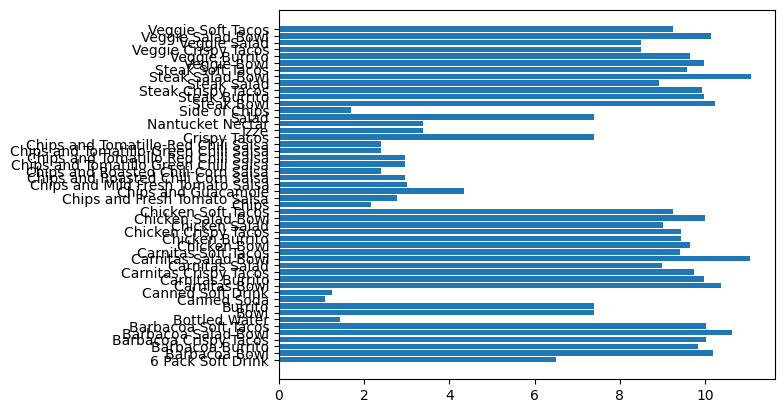

In [91]:
# 아이템당 가격분포 그래프 바형 그래프 출력

x = group3.index
y = group3

plt.barh(x,y)
plt.show()

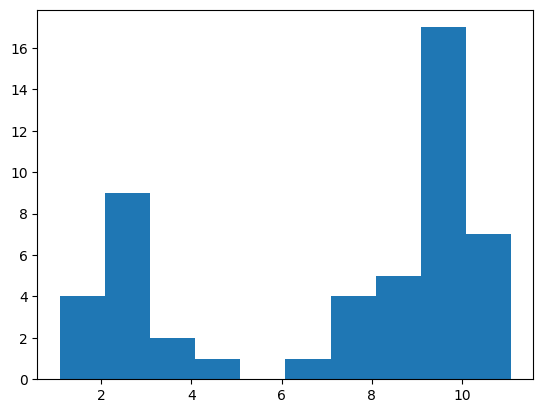

In [92]:
# 히스토그램 출력
plt.hist(y)
plt.show()

In [103]:
# chicken bowl 2개 이상 주문한 고객들이 주문한 chocken bowl의 총 주문 수량
# chicken bowl 2개 이상 주문한 내역 출력
chipotle_copy.loc[(chipotle_copy['item_name']=='Chicken Bowl') & (chipotle_copy['quantity'] >=2)].sum()['quantity']

68